# 바이든 대통령 취임사 주요 키워드 분석

<span style="color:red">
Step 1. nltk(Natural Language Took Kit) 모듈을 임포트하고, nltk.download( )메소드를 호출함  
</span>

In [2]:
import nltk  
nltk.download( )  

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
#type(nltk.download( ))  #nltk.download( ) 타입은 bool

<span style="color:red">
Step 2. 바이든 대통령 취임사를 읽은 후, 문장 토큰화
</span>

1) 바이든 연설문 파일 읽기

In [6]:
sentence = open("./Biden_speech.txt", encoding="cp949").read( )

print(type(sentence))
print(sentence)

<class 'str'>
Chief Justice Roberts, Vice President Harris, Speaker Pelosi, Leader Schumer, Leader McConnell, Vice President Pence, distinguished guests, and my fellow Americans.

This is America‘s day.
This is democracy’s day.
A day of history and hope.
Of renewal and resolve.

Through a crucible for the ages America has been tested anew and America has risen to the challenge.
Today, we celebrate the triumph not of a candidate, but of a cause, the cause of democracy.
The will of the people has been heard and the will of the people has been heeded.
We have learned again that democracy is precious.

Democracy is fragile.
And at this hour, my friends, democracy has prevailed.

So now, on this hallowed ground where just days ago violence sought to shake this Capitol‘s very foundation, we come together as one nation, under God, indivisible, to carry out the peaceful transfer of power as we have for more than two centuries.
We look ahead in our uniquely American way ? restless, bold, optimi

2) 바이든 연설문 토큰화하기

<span style="color:blue">
  nltk.tokenize.regexp에서 제공하는 RegexpTokenizer 방식을 활용하여 토큰화
</span>

아래와 같이  RegexpTokenizer에서 제공하는 tokenize()를 사용하면 "don't"로 토큰화됨  
RegexpTokenizer에서 제공하는 정규식 표현법 "[\w']+" 를 사용  

In [7]:
from nltk.tokenize.regexp import RegexpTokenizer

#"[\w']+" 정규식 표현법으로 ' 를 만나면 '의 앞뒤 단어를 연결한다는 뜻 
tokenizer = RegexpTokenizer( "[\w']+") 
biden_token = tokenizer.tokenize(sentence) #don't로 토큰화됨
print(biden_token)

['Chief', 'Justice', 'Roberts', 'Vice', 'President', 'Harris', 'Speaker', 'Pelosi', 'Leader', 'Schumer', 'Leader', 'McConnell', 'Vice', 'President', 'Pence', 'distinguished', 'guests', 'and', 'my', 'fellow', 'Americans', 'This', 'is', 'America', 's', 'day', 'This', 'is', 'democracy', 's', 'day', 'A', 'day', 'of', 'history', 'and', 'hope', 'Of', 'renewal', 'and', 'resolve', 'Through', 'a', 'crucible', 'for', 'the', 'ages', 'America', 'has', 'been', 'tested', 'anew', 'and', 'America', 'has', 'risen', 'to', 'the', 'challenge', 'Today', 'we', 'celebrate', 'the', 'triumph', 'not', 'of', 'a', 'candidate', 'but', 'of', 'a', 'cause', 'the', 'cause', 'of', 'democracy', 'The', 'will', 'of', 'the', 'people', 'has', 'been', 'heard', 'and', 'the', 'will', 'of', 'the', 'people', 'has', 'been', 'heeded', 'We', 'have', 'learned', 'again', 'that', 'democracy', 'is', 'precious', 'Democracy', 'is', 'fragile', 'And', 'at', 'this', 'hour', 'my', 'friends', 'democracy', 'has', 'prevailed', 'So', 'now', 'on'

<span style="color:blue">
참고 -  태깅(tagging) 처리
</span>

In [8]:
tagged = nltk.pos_tag(biden_token)  #토큰화되어있는 데이터를 태깅 처리

In [9]:
print(tagged)

[('Chief', 'JJ'), ('Justice', 'NNP'), ('Roberts', 'NNP'), ('Vice', 'NNP'), ('President', 'NNP'), ('Harris', 'NNP'), ('Speaker', 'NNP'), ('Pelosi', 'NNP'), ('Leader', 'NNP'), ('Schumer', 'NNP'), ('Leader', 'NNP'), ('McConnell', 'NNP'), ('Vice', 'NNP'), ('President', 'NNP'), ('Pence', 'NNP'), ('distinguished', 'VBD'), ('guests', 'NNS'), ('and', 'CC'), ('my', 'PRP$'), ('fellow', 'JJ'), ('Americans', 'NNPS'), ('This', 'DT'), ('is', 'VBZ'), ('America', 'NNP'), ('s', 'JJ'), ('day', 'NN'), ('This', 'DT'), ('is', 'VBZ'), ('democracy', 'JJ'), ('s', 'JJ'), ('day', 'NN'), ('A', 'DT'), ('day', 'NN'), ('of', 'IN'), ('history', 'NN'), ('and', 'CC'), ('hope', 'NN'), ('Of', 'IN'), ('renewal', 'NN'), ('and', 'CC'), ('resolve', 'VB'), ('Through', 'IN'), ('a', 'DT'), ('crucible', 'JJ'), ('for', 'IN'), ('the', 'DT'), ('ages', 'NNS'), ('America', 'NNP'), ('has', 'VBZ'), ('been', 'VBN'), ('tested', 'VBN'), ('anew', 'RB'), ('and', 'CC'), ('America', 'NNP'), ('has', 'VBZ'), ('risen', 'VBN'), ('to', 'TO'), ('t

In [10]:
tagged[0:6]

[('Chief', 'JJ'),
 ('Justice', 'NNP'),
 ('Roberts', 'NNP'),
 ('Vice', 'NNP'),
 ('President', 'NNP'),
 ('Harris', 'NNP')]

<span style="color:red">
Step 3.  불용어 제거하기
</span> 

<span style="color:blue">
1) 기본적으로 제공되는 불용어 사전 함수 stopwords를 임포트하여 불용어 제거하기
</span>

In [11]:
from nltk.corpus import stopwords  #stopwords는 기본적으로 제공되는 불용어 사전 함수
#print(stopwords.words()) #기본적으로 제공되는 불용어 확인

In [12]:
print("불용어 제거 전 :", biden_token)
print("불용어 제거 전 남은 단어 개수 :", len(biden_token))

불용어 제거 전 : ['Chief', 'Justice', 'Roberts', 'Vice', 'President', 'Harris', 'Speaker', 'Pelosi', 'Leader', 'Schumer', 'Leader', 'McConnell', 'Vice', 'President', 'Pence', 'distinguished', 'guests', 'and', 'my', 'fellow', 'Americans', 'This', 'is', 'America', 's', 'day', 'This', 'is', 'democracy', 's', 'day', 'A', 'day', 'of', 'history', 'and', 'hope', 'Of', 'renewal', 'and', 'resolve', 'Through', 'a', 'crucible', 'for', 'the', 'ages', 'America', 'has', 'been', 'tested', 'anew', 'and', 'America', 'has', 'risen', 'to', 'the', 'challenge', 'Today', 'we', 'celebrate', 'the', 'triumph', 'not', 'of', 'a', 'candidate', 'but', 'of', 'a', 'cause', 'the', 'cause', 'of', 'democracy', 'The', 'will', 'of', 'the', 'people', 'has', 'been', 'heard', 'and', 'the', 'will', 'of', 'the', 'people', 'has', 'been', 'heeded', 'We', 'have', 'learned', 'again', 'that', 'democracy', 'is', 'precious', 'Democracy', 'is', 'fragile', 'And', 'at', 'this', 'hour', 'my', 'friends', 'democracy', 'has', 'prevailed', 'So', 

In [13]:
stop_1 = [ stop_word for stop_word in biden_token   #불용어에 해당하면 stop_1 리스트에 추가
          if stop_word in stopwords.words() ]

In [14]:
result_1= [ each_word for each_word in biden_token  #불용어에 해당하지 않으면 result_1 리스트에 추가
          if each_word not in stopwords.words() ]

In [15]:
print("불용어에 해당하는 단어 :", stop_1)
print("불용어에 해당하는 단어 :", len(stop_1))

불용어에 해당하는 단어 : ['and', 'my', 'is', 's', 'is', 's', 'of', 'and', 'and', 'a', 'for', 'the', 'has', 'been', 'and', 'has', 'to', 'the', 'we', 'the', 'not', 'of', 'a', 'but', 'of', 'a', 'cause', 'the', 'cause', 'of', 'will', 'of', 'the', 'people', 'has', 'been', 'and', 'the', 'will', 'of', 'the', 'people', 'has', 'been', 'have', 'again', 'that', 'is', 'is', 'at', 'this', 'my', 'has', 'now', 'on', 'this', 'where', 'just', 'to', 'this', 's', 'very', 'we', 'come', 'together', 'as', 'one', 'under', 'to', 'out', 'the', 'of', 'as', 'we', 'have', 'for', 'more', 'than', 'two', 'look', 'in', 'our', 'way', 'and', 'our', 'on', 'the', 'we', 'know', 'we', 'can', 'be', 'and', 'we', 'must', 'be', 'thank', 'my', 'of', 'both', 'for', 'their', 'here', 'thank', 'them', 'from', 'the', 'of', 'my', 'know', 'the', 'of', 'our', 'and', 'the', 'of', 'our', 'does', 'who', 'to', 'last', 'but', 'who', 'cannot', 'be', 'with', 'us', 'but', 'whom', 'we', 'for', 'his', 'of', 'have', 'just', 'taken', 'the', 'each', 'of', 't

In [16]:
print("불용어 제거 후 :", result_1)
print("불용어 제거 후 남은 단어 개수 :", len(result_1))

불용어 제거 후 : ['Chief', 'Justice', 'Roberts', 'Vice', 'President', 'Harris', 'Speaker', 'Pelosi', 'Leader', 'Schumer', 'Leader', 'McConnell', 'Vice', 'President', 'Pence', 'distinguished', 'guests', 'fellow', 'Americans', 'This', 'America', 'day', 'This', 'democracy', 'day', 'A', 'day', 'history', 'hope', 'Of', 'renewal', 'resolve', 'Through', 'crucible', 'ages', 'America', 'tested', 'anew', 'America', 'risen', 'challenge', 'Today', 'celebrate', 'triumph', 'candidate', 'democracy', 'The', 'heard', 'heeded', 'We', 'learned', 'democracy', 'precious', 'Democracy', 'fragile', 'And', 'hour', 'friends', 'democracy', 'prevailed', 'So', 'hallowed', 'ground', 'days', 'ago', 'violence', 'sought', 'shake', 'Capitol', 'foundation', 'nation', 'God', 'indivisible', 'carry', 'peaceful', 'transfer', 'power', 'centuries', 'We', 'ahead', 'uniquely', 'American', 'restless', 'bold', 'optimistic', 'set', 'sights', 'nation', 'I', 'predecessors', 'parties', 'presence', 'I', 'bottom', 'heart', 'You', 'resilience

<span style="color:blue">
2) 불용어 사전을 직접 만들어서 추가 불용어 제거하기
</span>

In [18]:
make_stopword = open("./biden_stopword_list.txt").read()
print(make_stopword)

We
The
And
done


In [19]:
print("직접 만든 불용어 제거 전         :", result_1)

stop_2 = [ stop_word for stop_word in result_1   #불용어에 해당하면 stop 리스트에 추가
          if stop_word in make_stopword ]

result_2= [ each_word for each_word in result_1  #불용어에 해당하지 않으면 result_1 리스트에 추가
          if each_word not in make_stopword ]

print("직접 만든 불용어에 해당하는 단어 :", stop_2)
print("직접 만든 불용어 제거 후         :", result_2)
print("직접 만든 불용어 제거 후 남은 단어 개수 :", len(result_2))

직접 만든 불용어 제거 전         : ['Chief', 'Justice', 'Roberts', 'Vice', 'President', 'Harris', 'Speaker', 'Pelosi', 'Leader', 'Schumer', 'Leader', 'McConnell', 'Vice', 'President', 'Pence', 'distinguished', 'guests', 'fellow', 'Americans', 'This', 'America', 'day', 'This', 'democracy', 'day', 'A', 'day', 'history', 'hope', 'Of', 'renewal', 'resolve', 'Through', 'crucible', 'ages', 'America', 'tested', 'anew', 'America', 'risen', 'challenge', 'Today', 'celebrate', 'triumph', 'candidate', 'democracy', 'The', 'heard', 'heeded', 'We', 'learned', 'democracy', 'precious', 'Democracy', 'fragile', 'And', 'hour', 'friends', 'democracy', 'prevailed', 'So', 'hallowed', 'ground', 'days', 'ago', 'violence', 'sought', 'shake', 'Capitol', 'foundation', 'nation', 'God', 'indivisible', 'carry', 'peaceful', 'transfer', 'power', 'centuries', 'We', 'ahead', 'uniquely', 'American', 'restless', 'bold', 'optimistic', 'set', 'sights', 'nation', 'I', 'predecessors', 'parties', 'presence', 'I', 'bottom', 'heart', 'You

<span style="color:blue">
3) 글자수로 불용어 제거하기
</span>

In [20]:
result_3 = []
for i in result_2 :
    if len(i) >= 2 and len(i) <= 10 :
        result_3.append(i) 
print("글자수가 2 이상이고, 10 이하인 단어만 추출 : ",result_3)
print("글자수로 불용어 제거 후 남은 단어 개수 :", len(result_3))

글자수가 2 이상이고, 10 이하인 단어만 추출 :  ['Chief', 'Justice', 'Roberts', 'Vice', 'President', 'Harris', 'Speaker', 'Pelosi', 'Leader', 'Schumer', 'Leader', 'McConnell', 'Vice', 'President', 'Pence', 'guests', 'fellow', 'Americans', 'This', 'America', 'day', 'This', 'democracy', 'day', 'day', 'history', 'hope', 'Of', 'renewal', 'resolve', 'Through', 'crucible', 'ages', 'America', 'tested', 'anew', 'America', 'risen', 'challenge', 'Today', 'celebrate', 'triumph', 'candidate', 'democracy', 'heard', 'heeded', 'learned', 'democracy', 'precious', 'Democracy', 'fragile', 'hour', 'friends', 'democracy', 'prevailed', 'So', 'hallowed', 'ground', 'days', 'ago', 'violence', 'sought', 'shake', 'Capitol', 'foundation', 'nation', 'God', 'carry', 'peaceful', 'transfer', 'power', 'centuries', 'ahead', 'uniquely', 'American', 'restless', 'bold', 'optimistic', 'set', 'sights', 'nation', 'parties', 'presence', 'bottom', 'heart', 'You', 'resilience', 'strength', 'nation', 'As', 'President', 'Carter', 'spoke', 'night'

<span style="color:red">
Step 4.  추출된 단어의 출력 빈도수 산출하기
</span> 

In [21]:
from collections import Counter

freq_result = Counter(result_3) #단어별 빈도수 생성
print(freq_result)
print(type(freq_result))

Counter({'America': 20, 'nation': 14, 'democracy': 10, 'Americans': 9, 'American': 9, 'story': 9, 'President': 7, 'That': 7, 'history': 6, 'days': 6, 'today': 6, 'It': 6, 'unity': 6, 'work': 6, 'children': 6, 'world': 6, 'stand': 6, 'fellow': 5, 'This': 5, 'day': 5, 'Of': 5, 'power': 5, 'But': 5, 'If': 5, 'moment': 5, 'Not': 5, 'truth': 5, 'God': 4, 'centuries': 4, 'peace': 4, 'forward': 4, 'Much': 4, 'virus': 4, 'country': 4, 'lost': 4, 'War': 4, 'justice': 4, 'To': 4, 'soul': 4, 'things': 4, 'My': 4, 'time': 4, 'Let': 4, 'Here': 4, 'love': 4, 'There': 4, 'defend': 4, 'Vice': 3, 'hope': 3, 'resolve': 3, 'challenge': 3, 'Today': 3, 'prevailed': 3, 'So': 3, 'ago': 3, 'violence': 3, 'heart': 3, 'strength': 3, 'sacred': 3, 'oath': 3, 'great': 3, 'jobs': 3, 'cry': 3, 'future': 3, 'join': 3, 'common': 3, 'fear': 3, 'faith': 3, 'meet': 3, 'believe': 3, 'gave': 3, 'What': 3, 'Will': 3, 'Harris': 2, 'Leader': 2, 'Through': 2, 'ages': 2, 'tested': 2, 'hour': 2, 'friends': 2, 'ground': 2, 'Capit

In [22]:
li_desc_freq_result = freq_result.most_common() #'collections.Counter'타입 데이터 내림차순 정렬 후 리스트 타입으로 받음
print(li_desc_freq_result)
print(type(li_desc_freq_result))

[('America', 20), ('nation', 14), ('democracy', 10), ('Americans', 9), ('American', 9), ('story', 9), ('President', 7), ('That', 7), ('history', 6), ('days', 6), ('today', 6), ('It', 6), ('unity', 6), ('work', 6), ('children', 6), ('world', 6), ('stand', 6), ('fellow', 5), ('This', 5), ('day', 5), ('Of', 5), ('power', 5), ('But', 5), ('If', 5), ('moment', 5), ('Not', 5), ('truth', 5), ('God', 4), ('centuries', 4), ('peace', 4), ('forward', 4), ('Much', 4), ('virus', 4), ('country', 4), ('lost', 4), ('War', 4), ('justice', 4), ('To', 4), ('soul', 4), ('things', 4), ('My', 4), ('time', 4), ('Let', 4), ('Here', 4), ('love', 4), ('There', 4), ('defend', 4), ('Vice', 3), ('hope', 3), ('resolve', 3), ('challenge', 3), ('Today', 3), ('prevailed', 3), ('So', 3), ('ago', 3), ('violence', 3), ('heart', 3), ('strength', 3), ('sacred', 3), ('oath', 3), ('great', 3), ('jobs', 3), ('cry', 3), ('future', 3), ('join', 3), ('common', 3), ('fear', 3), ('faith', 3), ('meet', 3), ('believe', 3), ('gave', 

In [23]:
dic_desc_freq_result = dict(li_desc_freq_result) #딕셔너리 타입으로 변형
print(dic_desc_freq_result)
print(type(dic_desc_freq_result))

{'America': 20, 'nation': 14, 'democracy': 10, 'Americans': 9, 'American': 9, 'story': 9, 'President': 7, 'That': 7, 'history': 6, 'days': 6, 'today': 6, 'It': 6, 'unity': 6, 'work': 6, 'children': 6, 'world': 6, 'stand': 6, 'fellow': 5, 'This': 5, 'day': 5, 'Of': 5, 'power': 5, 'But': 5, 'If': 5, 'moment': 5, 'Not': 5, 'truth': 5, 'God': 4, 'centuries': 4, 'peace': 4, 'forward': 4, 'Much': 4, 'virus': 4, 'country': 4, 'lost': 4, 'War': 4, 'justice': 4, 'To': 4, 'soul': 4, 'things': 4, 'My': 4, 'time': 4, 'Let': 4, 'Here': 4, 'love': 4, 'There': 4, 'defend': 4, 'Vice': 3, 'hope': 3, 'resolve': 3, 'challenge': 3, 'Today': 3, 'prevailed': 3, 'So': 3, 'ago': 3, 'violence': 3, 'heart': 3, 'strength': 3, 'sacred': 3, 'oath': 3, 'great': 3, 'jobs': 3, 'cry': 3, 'future': 3, 'join': 3, 'common': 3, 'fear': 3, 'faith': 3, 'meet': 3, 'believe': 3, 'gave': 3, 'What': 3, 'Will': 3, 'Harris': 2, 'Leader': 2, 'Through': 2, 'ages': 2, 'tested': 2, 'hour': 2, 'friends': 2, 'ground': 2, 'Capitol': 2, 

<span style="color:red">
Step 5.  추출된 단어의 출력 빈도수를 그래프를 활용하여 시각화하기
</span>   

<span style="color:blue">  
1) 리스트 타입의 데이터를 기반으로 그래프 그리기 :       
       nltk.Text()를 활용하여 리스트 타입의 데이터를 plot()을 활용하여 그래프로 표현  
</span>  

In [24]:
print(result_3)  #리스트 타입

['Chief', 'Justice', 'Roberts', 'Vice', 'President', 'Harris', 'Speaker', 'Pelosi', 'Leader', 'Schumer', 'Leader', 'McConnell', 'Vice', 'President', 'Pence', 'guests', 'fellow', 'Americans', 'This', 'America', 'day', 'This', 'democracy', 'day', 'day', 'history', 'hope', 'Of', 'renewal', 'resolve', 'Through', 'crucible', 'ages', 'America', 'tested', 'anew', 'America', 'risen', 'challenge', 'Today', 'celebrate', 'triumph', 'candidate', 'democracy', 'heard', 'heeded', 'learned', 'democracy', 'precious', 'Democracy', 'fragile', 'hour', 'friends', 'democracy', 'prevailed', 'So', 'hallowed', 'ground', 'days', 'ago', 'violence', 'sought', 'shake', 'Capitol', 'foundation', 'nation', 'God', 'carry', 'peaceful', 'transfer', 'power', 'centuries', 'ahead', 'uniquely', 'American', 'restless', 'bold', 'optimistic', 'set', 'sights', 'nation', 'parties', 'presence', 'bottom', 'heart', 'You', 'resilience', 'strength', 'nation', 'As', 'President', 'Carter', 'spoke', 'night', 'today', 'salute', 'lifetime

In [25]:
text_graph = nltk.Text(result_3) #nltk.Text는 불용어가 제거된 리스트를 받음
print(text_graph) 
print(type(text_graph))

<Text: Chief Justice Roberts Vice President Harris Speaker Pelosi...>
<class 'nltk.text.Text'>


plot(플롯)은 일반적으로 둘 이상의 변수 간의 관계를 나타내는 그래프로 데이터 세트를 나타내는 그래픽 기술

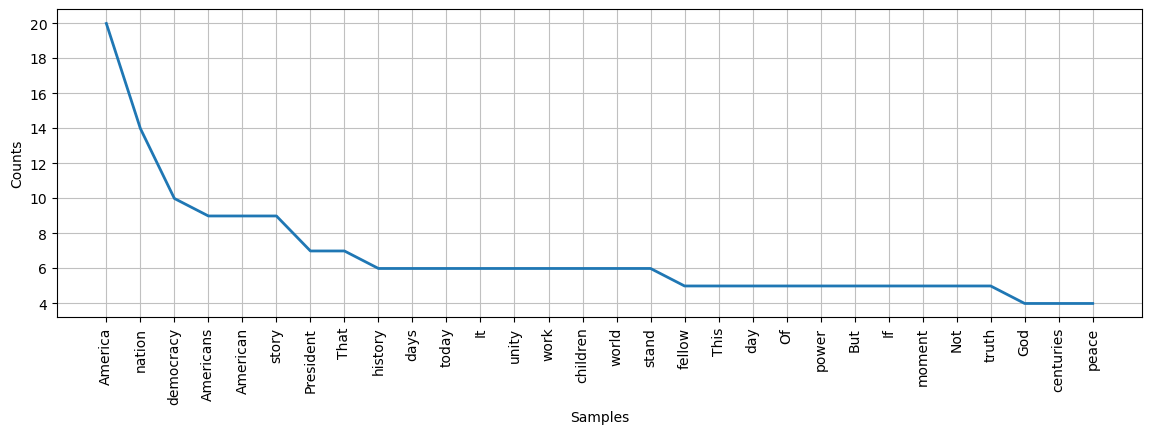

<Axes: xlabel='Samples', ylabel='Counts'>

In [26]:
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = (14,4) #가로 너비 14인치, 세로 높이 4인치 
plt.rcParams['axes.grid'] = False #또는 True

text_graph.plot(30) #class 'nltk.text.Text인 타입의 데이터를 plot을 활용하여 30개 항목을 그래프로 출력

<span style="color:blue">  
2) 딕셔너리 타입의 데이터를 기반으로 그래프 그리기 :    
    FreqDist()를 활용하여 딕셔너리 타입의 데이터를 plot()을 활용하여 그래프로 표현  
</span>  

In [27]:
print(dic_desc_freq_result)  #딕셔너리 타입

{'America': 20, 'nation': 14, 'democracy': 10, 'Americans': 9, 'American': 9, 'story': 9, 'President': 7, 'That': 7, 'history': 6, 'days': 6, 'today': 6, 'It': 6, 'unity': 6, 'work': 6, 'children': 6, 'world': 6, 'stand': 6, 'fellow': 5, 'This': 5, 'day': 5, 'Of': 5, 'power': 5, 'But': 5, 'If': 5, 'moment': 5, 'Not': 5, 'truth': 5, 'God': 4, 'centuries': 4, 'peace': 4, 'forward': 4, 'Much': 4, 'virus': 4, 'country': 4, 'lost': 4, 'War': 4, 'justice': 4, 'To': 4, 'soul': 4, 'things': 4, 'My': 4, 'time': 4, 'Let': 4, 'Here': 4, 'love': 4, 'There': 4, 'defend': 4, 'Vice': 3, 'hope': 3, 'resolve': 3, 'challenge': 3, 'Today': 3, 'prevailed': 3, 'So': 3, 'ago': 3, 'violence': 3, 'heart': 3, 'strength': 3, 'sacred': 3, 'oath': 3, 'great': 3, 'jobs': 3, 'cry': 3, 'future': 3, 'join': 3, 'common': 3, 'fear': 3, 'faith': 3, 'meet': 3, 'believe': 3, 'gave': 3, 'What': 3, 'Will': 3, 'Harris': 2, 'Leader': 2, 'Through': 2, 'ages': 2, 'tested': 2, 'hour': 2, 'friends': 2, 'ground': 2, 'Capitol': 2, 

In [29]:
import matplotlib.font_manager as fm   #한글 사용을 위해서 임포트
import matplotlib

font_location="./fonts/Pretendard-Regular.otf"  #한글 폰트를 셋팅함

#fm은 matplotlib.font_manager에서 제공됨 
font_name=fm.FontProperties(fname=font_location).get_name() 

matplotlib.rc('font',family=font_name) #한글 깨짐을 방지하기 위해서 반드시 해야할 부분

In [30]:
#plot(플롯)의 의미를 import matplotlib.pyplot as plt 에서 제공함 

#plt.title('단어별 빈도수 출력') #import matplotlib.pyplot as plt으로 부터 그래프에서 title 출력 부분 

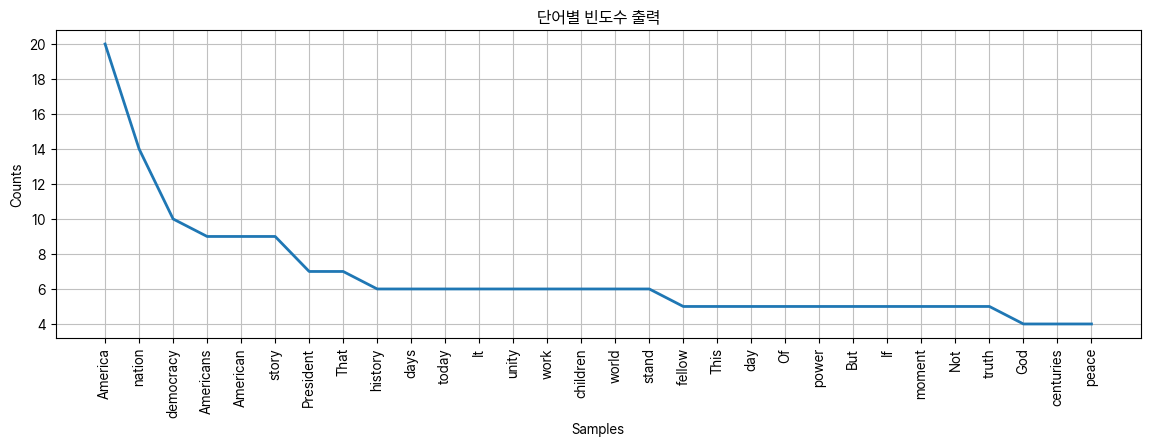

<Axes: title={'center': '단어별 빈도수 출력'}, xlabel='Samples', ylabel='Counts'>

In [31]:
#plot(플롯)의 의미를 import matplotlib.pyplot as plt 에서 제공함 
plt.title('단어별 빈도수 출력') #import matplotlib.pyplot as plt으로 부터 그래프에서 title 출력 부분 

from nltk.probability import FreqDist

final_graph = FreqDist(dic_desc_freq_result) #FreqDist()는 딕셔너리 타입의 데이터를 셋팅해야 함
final_graph.plot(30)  #여기에서 (30)의 의미는 빈도수가 높은것부터 30개를 그래프에 출력하겠다는 뜻

<span style="color:red">
Step 6.  추출된 단어의 빈도수를 워드클라우드를 활용하여 시각화하기   (딕셔너리 타입의 데이터 사용)
</span>   

In [27]:
print(dic_desc_freq_result)

{'America': 20, 'nation': 14, 'democracy': 10, 'Americans': 9, 'American': 9, 'story': 9, 'President': 7, 'That': 7, 'history': 6, 'days': 6, 'today': 6, 'It': 6, 'unity': 6, 'work': 6, 'children': 6, 'world': 6, 'stand': 6, 'fellow': 5, 'This': 5, 'day': 5, 'Of': 5, 'power': 5, 'But': 5, 'If': 5, 'moment': 5, 'Not': 5, 'truth': 5, 'God': 4, 'centuries': 4, 'peace': 4, 'forward': 4, 'Much': 4, 'virus': 4, 'country': 4, 'lost': 4, 'War': 4, 'justice': 4, 'To': 4, 'soul': 4, 'things': 4, 'My': 4, 'time': 4, 'Let': 4, 'Here': 4, 'love': 4, 'There': 4, 'defend': 4, 'Vice': 3, 'hope': 3, 'resolve': 3, 'challenge': 3, 'Today': 3, 'prevailed': 3, 'So': 3, 'ago': 3, 'violence': 3, 'heart': 3, 'strength': 3, 'sacred': 3, 'oath': 3, 'great': 3, 'jobs': 3, 'cry': 3, 'future': 3, 'join': 3, 'common': 3, 'fear': 3, 'faith': 3, 'meet': 3, 'believe': 3, 'gave': 3, 'What': 3, 'Will': 3, 'Harris': 2, 'Leader': 2, 'Through': 2, 'ages': 2, 'tested': 2, 'hour': 2, 'friends': 2, 'ground': 2, 'Capitol': 2, 

In [33]:
from wordcloud import WordCloud
wordcloud = WordCloud(font_path='./fonts/Pretendard-Regular.otf' ,
                      relative_scaling = 0.5 ,
                      background_color='white' ).generate_from_frequencies(dic_desc_freq_result) #딕셔너리 타입을 셋팅

이미지 크기 :  Figure(1000x600)


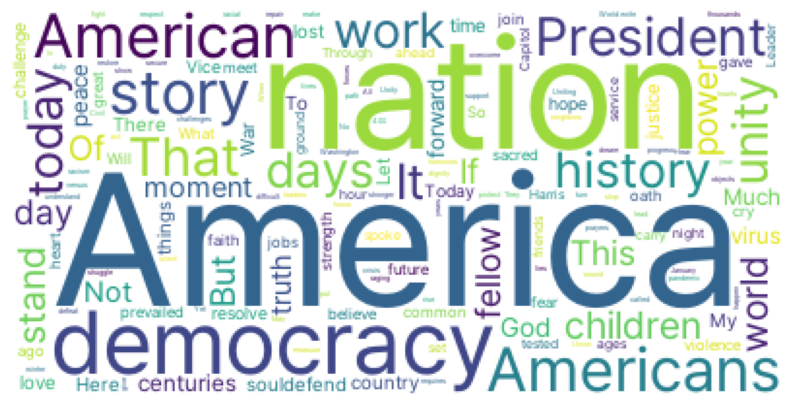

In [35]:
#import matplotlib.pyplot as plt 여기에서 plt 제공됨
#print(dic_desc_freq_result)

plt.rcParams["figure.figsize"] = (10,6) #가로 너비 10인치, 세로 높이 4인치 
plt.rcParams['axes.grid'] = False #또는 True

fig = plt.figure() #이미지 크기가 할당됨 
print("이미지 크기 : ", fig)

plt.imshow(wordcloud)  #이미지가 화면에 출력
plt.axis('off') #또는 plt.axis('on') -> 이 부분을 ('on') 을 의미하며 이 경우 x,y축이 출력된다. 

fig.savefig('./biden_image.png') #이미지가 파일로 저장

이미지 크기 :  Figure(1300x800)


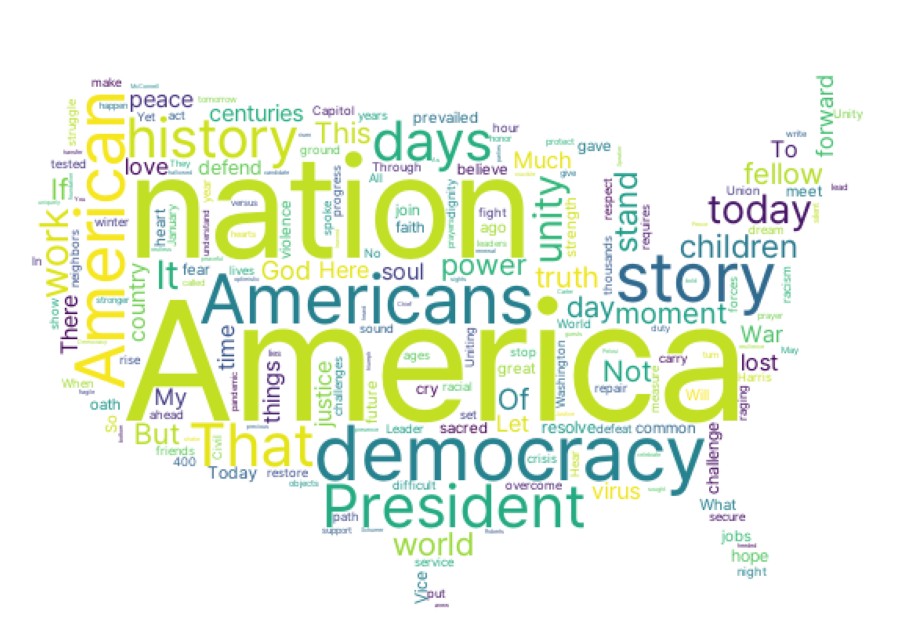

In [36]:
import numpy as np         # pip install numpy
from PIL import Image      # pip install Image


america = np.array(Image.open("./america_map.png")) 

wordcloud = WordCloud(font_path='./fonts/Pretendard-Regular.otf',
                      mask = america,
                      relative_scaling = 0.5 ,
                      background_color='white' ).generate_from_frequencies(dic_desc_freq_result) #딕셔너리 타입을 셋팅

plt.rcParams["figure.figsize"] = (13,8) #가로 너비 10인치, 세로 높이 4인치 
plt.rcParams['axes.grid'] = False #또는 True

fig = plt.figure() #이미지 크기가 할당됨 
print("이미지 크기 : ", fig)

plt.imshow(wordcloud)  #이미지가 화면에 출력
plt.axis('off') #또는 plt.axis('on') -> 이 부분을 ('on') 을 의미하며 이 경우 x,y축이 출력된다. 

fig.savefig('./biden_america_map_image.png') #이미지가 파일로 저장
